In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [20]:
df = pd.read_csv("diabetes.csv")

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
err = 1 - acc
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

Confusion Matrix:
 [[79 20]
 [27 28]]
Accuracy: 0.695
Error Rate: 0.305
Precision: 0.583
Recall: 0.509


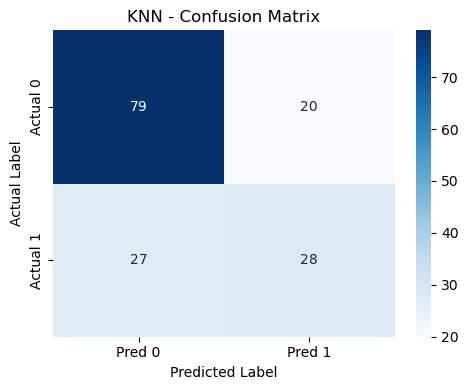

In [28]:
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.3f}")
print(f"Error Rate: {err:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.title(f"KNN - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()